<a href="https://colab.research.google.com/github/pamulah/test-thesis/blob/master/cnn_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from sklearn.metrics import roc_auc_score

class Histories(keras.callbacks.Callback):
	def on_train_begin(self, logs={}):
		self.aucs = []
		self.losses = []

	def on_train_end(self, logs={}):
		return

	def on_epoch_begin(self, epoch, logs={}):
		return

	def on_epoch_end(self, epoch, logs={}):
		self.losses.append(logs.get('loss'))
		y_pred = self.model.predict(self.validation_data[0])
		self.aucs.append(roc_auc_score(self.validation_data[1], y_pred))
		a = (roc_auc_score(self.validation_data[1], y_pred))
		print(" AUC_on_val: %f " % a)
		return

	def on_batch_begin(self, batch, logs={}):
		return

	def on_batch_end(self, batch, logs={}):    return
  
from google.colab import drive
drive.mount('/content/drive')


Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
'''Example of how to use sklearn wrapper

Builds simple CNN models on MNIST and uses sklearn's GridSearchCV to find best model
'''

from __future__ import print_function

import keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import GridSearchCV

import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
K.set_image_dim_ordering('th')
import numpy as np
from sklearn import preprocessing
from keras.datasets import mnist
import glob
import os
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

num_classes = 2

# input image dimensions
#img_rows, img_cols = 28, 28

# load training data and do basic data normalization
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train = numpy.load('drive/My Drive/X_train.npy')
y_train = numpy.load('drive/My Drive/y_train.npy')
X_test = numpy.load('drive/My Drive/X_test.npy')
y_test = numpy.load('drive/My Drive/y_test.npy')

X_train = X_train.reshape(X_train.shape[0], 1, 60, 87).astype('float32')
#X_val = X_val.reshape(X_val.shape[0], 1, 60, 87).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 60, 87).astype('float32')


'''if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255'''

input_shape = (1, 60, 87)
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(30581, 1, 60, 87) (30581,)
(10793, 1, 60, 87) (10793,)


In [0]:
#@title
def make_model(dense_layer_sizes, filters, kernel_size, pool_size):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size,input_shape=input_shape, activation='relu'))
    #model.add(Activation('relu'))
    #model.add(Conv2D(filters, kernel_size))
    #model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))

    model.add(Flatten())
    #for layer_size in dense_layer_sizes:
    model.add(Dense(dense_layer_sizes))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    return model



In [0]:
def make_model_modified(dense_layer_sizes, filters, kernel_size, pool_size):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size,input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Conv2D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Conv2D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
   
    model.add(Flatten())
    model.add(Dense(dense_layer_sizes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [0]:
#@title
def larger_model():
  model = Sequential()
  model.add(Conv2D(20, (3,3), input_shape=(1, 60, 87), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(20, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(20, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  #model.compile(loss=roc_auc_score_loss, optimizer='adam', metrics=['accuracy','mae'])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

  

In [0]:
# build the model
#del model
#dense_size_candidates = [[32], [64], [32, 32], [64, 64]]
#model = make_model(5, 20, 3, 2)
#model.fit(X_train, y_train, epochs=5, batch_size=32)

my_classifier = KerasClassifier(make_model_modified)
validator = GridSearchCV(my_classifier,
                         param_grid={'dense_layer_sizes': [256],
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [40],
                                     'filters': [20],
                                     'kernel_size': [(3,3)],
                                     'pool_size': [(2,2)],
                                     'batch_size': [32]}, 
                         scoring='neg_log_loss', n_jobs=1)


In [0]:
histories = Histories()

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',numpy.unique(y_train),y_train)
print(class_weights)

grid_result = validator.fit(X_train, y_train, class_weight = class_weights)

[ 0.50930984 27.35330948]
Epoch 1/40
20387/20387 [==============================] - 11s 518us/step - loss: 0.0791 - acc: 0.9885
Epoch 2/40
20387/20387 [==============================] - 10s 471us/step - loss: 0.0646 - acc: 0.9893
Epoch 3/40
20387/20387 [==============================] - 10s 470us/step - loss: 0.0625 - acc: 0.9893
Epoch 4/40
20387/20387 [==============================] - 10s 477us/step - loss: 0.0625 - acc: 0.9893
Epoch 5/40
20387/20387 [==============================] - 10s 469us/step - loss: 0.0626 - acc: 0.9893
Epoch 6/40
20387/20387 [==============================] - 10s 476us/step - loss: 0.0623 - acc: 0.9893
Epoch 7/40
20387/20387 [==============================] - 10s 477us/step - loss: 0.0629 - acc: 0.9893
Epoch 8/40
20387/20387 [==============================] - 10s 472us/step - loss: 0.0617 - acc: 0.9893
Epoch 9/40
20387/20387 [==============================] - 9s 463us/step - loss: 0.0622 - acc: 0.9894
Epoch 10/40
20387/20387 [==============================] 

In [0]:
print('The parameters of the best model are: ')
print(validator.best_params_)

best_model = validator.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(X_test, y_test)
for metric, value in zip(metric_names, metric_values):
  print(metric, ': ', value)
  
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
  
  

The parameters of the best model are: 
{'batch_size': 32, 'dense_layer_sizes': 256, 'epochs': 40, 'filters': 20, 'kernel_size': (3, 3), 'pool_size': (2, 2)}
10793/10793 [==============================] - 3s 315us/step
loss :  0.29735768614736047
acc :  0.9657185212637821
-0.151057 (0.081238) with: {'batch_size': 32, 'dense_layer_sizes': 256, 'epochs': 40, 'filters': 20, 'kernel_size': (3, 3), 'pool_size': (2, 2)}


AUC: 0.762


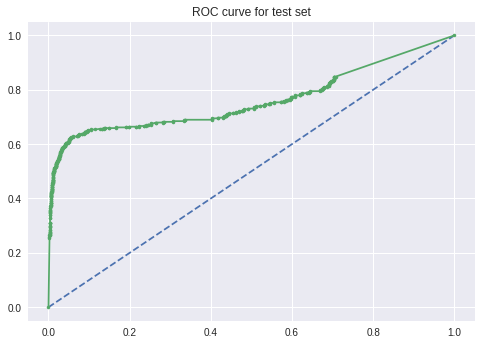

In [0]:
# calculate AUC of final model on a test set
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
y_test2 = numpy.load('drive/My Drive/y_test.npy')  # osobno, bo inny wymiar

auc = roc_auc_score(y_test2, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test2, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
plt.title('ROC curve for test set')
pyplot.show()